<a href="https://colab.research.google.com/github/maxxies/accra-house-pricing-ml-model/blob/main/Accra_house_pricing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import sklearn.externals 
import warnings 
import pickle
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import seaborn as sns

## Loading dataset from local storage

In [ ]:
from google.colab import files
data = files.upload()

Saving data.csv to data.csv


In [ ]:
housing_data = pd.read_csv("data.csv")   # Loading dataset to pandas dataframe
housing_data.info()
housing_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   2330 non-null   object 
 1   Latitude   2330 non-null   float64
 2   Longitude  2330 non-null   float64
 3   Bedrooms   2320 non-null   float64
 4   Garage     940 non-null    float64
 5   Bathrooms  2308 non-null   float64
 6   Price      2330 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 127.5+ KB


,Location,Latitude,Longitude,Bedrooms,Garage,Bathrooms,Price
0,East legon hills,5.692759,-0.100474,4.0,NaN,5.0,1968600
1,East legon,5.639285,-0.162459,5.0,NaN,4.0,4778014
2,Adenta,5.704139,-0.168796,2.0,NaN,2.0,545600
3,East legon hills,5.692759,-0.100474,4.0,NaN,5.0,1968600
4,Adenta,5.704139,-0.168796,3.0,NaN,3.0,979600


## Filling all missing spaces especially in "Garage" column

In [ ]:
imputer = SimpleImputer(strategy='median');
housing_data_rooms = housing_data.drop(["Location", "Longitude", "Latitude", "Price"], axis=1)
transformed_data = imputer.fit_transform(housing_data_rooms)
new_rooms_data = pd.DataFrame(transformed_data, columns=housing_data_rooms.columns, index=housing_data_rooms.index)
# New transformed data set after filling all missing spaces
new_housing_data = pd.concat([housing_data.drop(["Bathrooms", "Garage", "Bedrooms"], axis=1), new_rooms_data], axis=1)    # Concatenating dataframes of transformed data with part of existing dataframe
new_housing_data.info()
new_housing_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   2330 non-null   object 
 1   Latitude   2330 non-null   float64
 2   Longitude  2330 non-null   float64
 3   Price      2330 non-null   int64  
 4   Bedrooms   2330 non-null   float64
 5   Garage     2330 non-null   float64
 6   Bathrooms  2330 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 127.5+ KB


,Location,Latitude,Longitude,Price,Bedrooms,Garage,Bathrooms
0,East legon hills,5.692759,-0.100474,1968600,4.0,3.0,5.0
1,East legon,5.639285,-0.162459,4778014,5.0,3.0,4.0
2,Adenta,5.704139,-0.168796,545600,2.0,3.0,2.0
3,East legon hills,5.692759,-0.100474,1968600,4.0,3.0,5.0
4,Adenta,5.704139,-0.168796,979600,3.0,3.0,3.0


## Correlations of features with "Price" feature

Price        1.000000
Bedrooms     0.177746
Bathrooms    0.154974
Garage       0.046840
Longitude   -0.001204
Latitude    -0.097869
Name: Price, dtype: float64
           Latitude  Longitude     Price  Bedrooms    Garage  Bathrooms
Latitude   1.000000   0.350324 -0.097869 -0.152484 -0.029670  -0.130367
Longitude  0.350324   1.000000 -0.001204 -0.049472 -0.019589  -0.016928
Price     -0.097869  -0.001204  1.000000  0.177746  0.046840   0.154974
Bedrooms  -0.152484  -0.049472  0.177746  1.000000  0.031754   0.874607
Garage    -0.029670  -0.019589  0.046840  0.031754  1.000000   0.023100
Bathrooms -0.130367  -0.016928  0.154974  0.874607  0.023100   1.000000


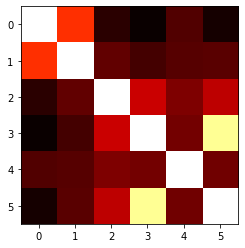

In [ ]:
corr_matrix = new_housing_data.corr()
plt.imshow(corr_matrix, cmap='hot')
print(corr_matrix["Price"].sort_values(ascending=False))
print(corr_matrix)
plt.show()

## Visualizing dataset

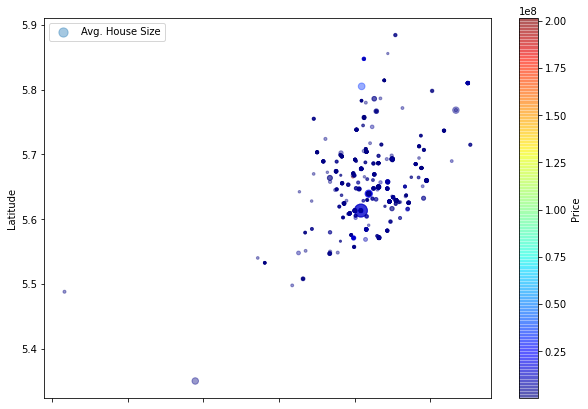

In [ ]:
new_housing_data.plot(kind="scatter", x="Longitude", y="Latitude", s=(new_housing_data["Bedrooms"] + new_housing_data["Bathrooms"] + new_housing_data["Garage"]/10), label="Avg. House Size" , c='Price', alpha=0.4, figsize=(10,7),  cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

##Pairplotting features 

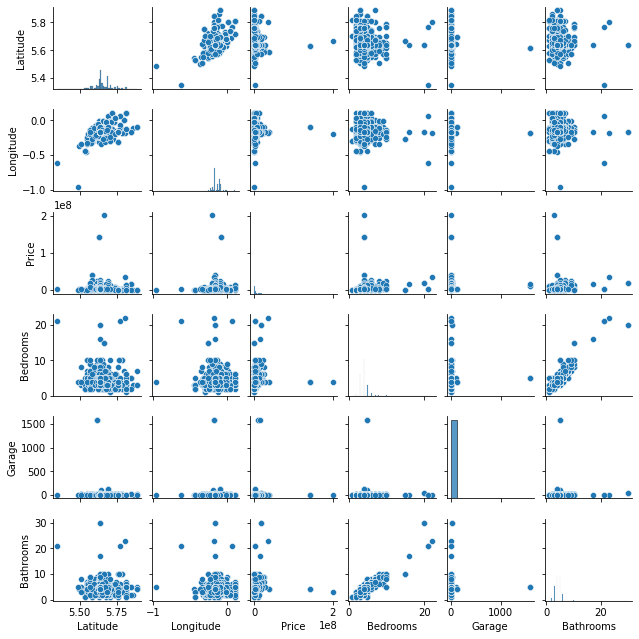

In [ ]:
sns.pairplot(new_housing_data,  diag_kind="hist", height=1.5)

## Handling Location attribute


In [ ]:
transformer = OneHotEncoder(handle_unknown="ignore")
transform = transformer.fit(new_housing_data[["Location"]])
# Saving encoder for user inputs
with open("encoder.pickle","wb") as file:
  pickle.dump(transform, file)
transformed = transformer.transform(new_housing_data[["Location"]]).toarray()
cat_data = pd.DataFrame(transformed, columns=transformer.categories_, index=new_housing_data["Location"].index)
prepared_housing_data = pd.concat([new_housing_data, cat_data], axis=1)    # Concatenating dataframes of transformed data with part of existing dataframe

prepared_housing_data.info()
prepared_housing_data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Columns: 232 entries, Location to ('Winneba',)
dtypes: float64(230), int64(1), object(1)
memory usage: 4.1+ MB


,Location,Latitude,Longitude,Price,Bedrooms,Garage,Bathrooms,"( achimota,)","( achimota mile 7,)","( east legon,)",...,"(Tse addo $330,)","(Tse addo $340,)","(Upsa road,)","(Weija,)","(Weija old barrier,)","(West legon,)","(West legon ,)","(West trasacco,)","(Westlands accra ghana ,)","(Winneba,)"
0,East legon hills,5.692759,-0.100474,1968600,4.0,3.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,East legon,5.639285,-0.162459,4778014,5.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Adenta,5.704139,-0.168796,545600,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,East legon hills,5.692759,-0.100474,1968600,4.0,3.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adenta,5.704139,-0.168796,979600,3.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting data into datasets

In [ ]:
housing_data = prepared_housing_data.drop(["Location",  "Price"], axis=1)  # Removes house prices and locations from data
housing_labels = prepared_housing_data['Price']    # Sets house prices to labels in a data frame
train_X, data_X, train_y, label_y = train_test_split(housing_data.values, housing_labels.values, test_size=0.20, random_state=47, shuffle=True)
# Splitting data into test datasets and validation datasets
test_X, validation_X, test_y, validation_y = train_test_split(data_X, label_y, random_state=47, shuffle=True, test_size=0.10)


## Model selection

In [ ]:
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
svr_reg = SVR()
etr_reg = ExtraTreesRegressor()
voting_reg = VotingRegressor(estimators=[('rf', rf_reg), ('lr', lr_reg), ('dt', dt_reg), ('svr_reg',svr_reg),('etr_reg', etr_reg)])


## Analysis of the predictors on test set

In [ ]:
print("Analysis of the predictors on the test dataset")
# print("Labels : {}".format(list(test_y[:5])))
for reg in (lr_reg, dt_reg, rf_reg,svr_reg,etr_reg, voting_reg):
    reg.fit(train_X, train_y)
    y_pred = reg.predict(test_X)
    scores = cross_val_score(reg, train_X, train_y, scoring="neg_mean_squared_error", cv=10)   # Checks for scores in sets of training data
    print("\n" + reg.__class__.__name__)
    print("Accuracy : {}".format(reg.score(test_X, test_y)* 100))
    print("Root Mean Squared Error : {}".format(mean_squared_error(test_y,y_pred, squared=False)))
    print("Mean Squared Error : {}".format(mean_squared_error(test_y,y_pred, squared=True)))
    print("Mean Absolute Error : {}".format(mean_absolute_error(test_y,y_pred)))
    print("Mean Absolute Percentage Error : {}".format(mean_absolute_percentage_error(test_y,y_pred)))
    print("R Squared: {}".format(r2_score(test_y,y_pred)))

Analysis of the predictors on the test dataset

LinearRegression
Accuracy : 44.97712898501571
Root Mean Squared Error : 1922861.5728772657
Mean Squared Error : 3697396628448.032
Mean Absolute Error : 1190570.3930617524
Mean Absolute Percentage Error : 4.4240036260169475
R Squared: 0.44977128985015713

DecisionTreeRegressor
Accuracy : 40.49682626656556
Root Mean Squared Error : 1999615.349692893
Mean Squared Error : 3998461546727.4307
Mean Absolute Error : 944671.6785465555
Mean Absolute Percentage Error : 3.8517149347931396
R Squared: 0.40496826266565566

RandomForestRegressor
Accuracy : 37.551917072560634
Root Mean Squared Error : 2048499.9231853276
Mean Squared Error : 4196351935290.2925
Mean Absolute Error : 1004776.544494909
Mean Absolute Percentage Error : 4.8355363858413405
R Squared: 0.37551917072560637

SVR
Accuracy : -5.571700936193524
Root Mean Squared Error : 2663484.3915120303
Mean Squared Error : 7094149103828.21
Mean Absolute Error : 1542434.4318909927
Mean Absolute Perce

## Analysis of the predictors on validation set


In [ ]:
print("Accuracy on validation dataset")
# print("Labels : {}".format(list(validation_y[:5])))
for reg in (lr_reg, dt_reg, rf_reg,svr_reg,etr_reg, voting_reg):
    reg.fit(train_X, train_y)
    y_pred = reg.predict(validation_X)
    print("\n" + reg.__class__.__name__)
    print("Accuracy : {}".format(reg.score(validation_X,validation_y)* 100))
    print("Root Mean Squared Error : {}".format(mean_squared_error(validation_y,y_pred, squared=False)))
    print("Mean Squared Error : {}".format(mean_squared_error(validation_y,y_pred, squared=True)))
    print("Mean Absolute Error : {}".format(mean_absolute_error(validation_y,y_pred)))
    print("Mean Absolute Percentage Error : {}".format(mean_absolute_percentage_error(validation_y,y_pred)))
    print("R Squared: {}".format(r2_score(validation_y,y_pred)))

Accuracy on validation dataset

LinearRegression
Accuracy : 35.67617665770443
Root Mean Squared Error : 2292940.48357204
Mean Squared Error : 5257576061203.582
Mean Absolute Error : 1349612.6348977026
Mean Absolute Percentage Error : 0.7319792307216378
R Squared: 0.3567617665770443

DecisionTreeRegressor
Accuracy : -46.01213041363954
Root Mean Squared Error : 3454628.29464387
Mean Squared Error : 11934456654154.016
Mean Absolute Error : 1354814.1584230056
Mean Absolute Percentage Error : 0.6986349971968765
R Squared: -0.4601213041363954

RandomForestRegressor
Accuracy : -53.27555358488556
Root Mean Squared Error : 3539511.3033127696
Mean Squared Error : 12528140266278.861
Mean Absolute Error : 1377348.245720164
Mean Absolute Percentage Error : 0.7005147943743348
R Squared: -0.5327555358488556

SVR
Accuracy : -6.539824482619694
Root Mean Squared Error : 2950956.7566434913
Mean Squared Error : 8708145779579.875
Mean Absolute Error : 1598179.6544462766
Mean Absolute Percentage Error : 0.9

## Analysis of predictors on Train data

In [ ]:
print("Accuracy on train dataset")
# print("Labels : {}".format(list(train_y[:5])))
for reg in (lr_reg, dt_reg, rf_reg,svr_reg,etr_reg, voting_reg):
    reg.fit(train_X, train_y)
    y_pred = reg.predict(train_X)
    print("\n" + reg.__class__.__name__)
    print("Accuracy : {}".format(reg.score(train_X,train_y)* 100))
    print("Root Mean Squared Error : {}".format(mean_squared_error(train_y,y_pred, squared=False)))
    print("Mean Squared Error : {}".format(mean_squared_error(train_y,y_pred, squared=True)))
    print("Mean Absolute Error : {}".format(mean_absolute_error(train_y,y_pred)))
    print("Mean Absolute Percentage Error : {}".format(mean_absolute_percentage_error(train_y,y_pred)))
    print("R Squared: {}".format(r2_score(train_y,y_pred)))

Accuracy on train dataset

LinearRegression
Accuracy : 42.17110616030823
Root Mean Squared Error : 6030211.641852509
Mean Squared Error : 36363452445533.53
Mean Absolute Error : 1514734.0908434526
Mean Absolute Percentage Error : 2.5908503689257945
R Squared: 0.42171106160308225

DecisionTreeRegressor
Accuracy : 49.60673462710038
Root Mean Squared Error : 5629195.898201181
Mean Squared Error : 31687846460324.996
Mean Absolute Error : 1003194.3422759767
Mean Absolute Percentage Error : 0.6082899291657716
R Squared: 0.4960673462710038

RandomForestRegressor
Accuracy : 44.431076383168644
Root Mean Squared Error : 5911206.1376442285
Mean Squared Error : 34942358001722.797
Mean Absolute Error : 1189386.9397411176
Mean Absolute Percentage Error : 1.0919476076364283
R Squared: 0.44431076383168644

SVR
Accuracy : -2.1311289692128144
Root Mean Squared Error : 8013812.529462093
Mean Squared Error : 64221191257363.62
Mean Absolute Error : 2048945.3988580361
Mean Absolute Percentage Error : 1.6881

## Saving linear regression model




In [ ]:
model = lr_reg.fit(train_X, train_y)
pickle.dump(model, open("model.pkl","wb"))


In [ ]:
loaded_model = pickle.load(open("model.pkl","rb"))
loaded_encoder = pickle.load(open("encoder.pickle","rb"))


def ValuePredictor(location,to_predict_list):
    userData={"Location" :[location]}
    data = pd.DataFrame(userData)
    enc=loaded_encoder.transform(data[["Location"]]).toarray()
    new_array = np.concatenate([to_predict_list,enc[0]]).reshape(1,230)
    result = loaded_model.predict(new_array)
    return abs(result[0])

predict = ValuePredictor("Ashaiman",[5.704139, -0.168796, 2.0, 4.0, 6.0])
print(predict)

6087896.664082885
